In [1]:
import pandas as pd

# Load the dataset
file_path = "Energy-Consumption-Dataset-India(2019-2020).csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

(None,
             Unnamed: 0  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand  \
 0  02/01/2019 00:00:00   119.9    130.3      234.1   85.8  313.9         40.7   
 1  03/01/2019 00:00:00   121.9    133.5      240.2   85.5  311.8         39.3   
 2  04/01/2019 00:00:00   118.8    128.2      239.8   83.5  320.7         38.1   
 3  05/01/2019 00:00:00   121.0    127.5      239.1   79.2  299.0         39.2   
 4  06/01/2019 00:00:00   121.4    132.6      240.4   76.6  286.8         39.2   
 
      HP   J&K  Chandigarh  ...  Odisha  West Bengal  Sikkim  \
 0  30.0  52.5         5.0  ...    70.2        108.2     2.0   
 1  30.1  54.1         4.9  ...    67.9        110.2     1.9   
 2  30.1  53.2         4.8  ...    66.3        106.8     1.7   
 3  30.2  51.5         4.3  ...    65.8        107.0     2.0   
 4  31.0  53.2         4.3  ...    62.9        106.4     2.0   
 
    Arunachal Pradesh  Assam  Manipur  Meghalaya  Mizoram  Nagaland  Tripura  
 0                2.1   21.7      

In [2]:
# Rename the first column to 'Date' and convert it to datetime format
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()

# Display summary statistics
summary_stats = df.describe()

missing_values, summary_stats


(Date                 305
 Punjab                 0
 Haryana                0
 Rajasthan              0
 Delhi                  0
 UP                     0
 Uttarakhand            0
 HP                     0
 J&K                    0
 Chandigarh             0
 Chhattisgarh           0
 Gujarat                0
 MP                     0
 Maharashtra            0
 Goa                    0
 DNH                    0
 Andhra Pradesh         0
 Telangana              0
 Karnataka              0
 Kerala                 0
 Tamil Nadu             0
 Pondy                  0
 Bihar                  0
 Jharkhand              0
 Odisha                 0
 West Bengal            0
 Sikkim                 0
 Arunachal Pradesh      0
 Assam                  0
 Manipur                0
 Meghalaya              0
 Mizoram                0
 Nagaland               0
 Tripura                0
 dtype: int64,
                                 Date      Punjab     Haryana   Rajasthan  \
 count                  

In [3]:
# Feature Engineering: Extracting Year, Month, and Day of the Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Compute the correlation matrix
correlation_matrix = df.drop(columns=['Date']).corr()

# Return correlation matrix
correlation_matrix


Punjab   Haryana  Rajasthan     Delhi        UP  \
Punjab             1.000000  0.955670   0.376721  0.902512  0.804649   
Haryana            0.955670  1.000000   0.517610  0.942060  0.839751   
Rajasthan          0.376721  0.517610   1.000000  0.442719  0.360466   
Delhi              0.902512  0.942060   0.442719  1.000000  0.906172   
UP                 0.804649  0.839751   0.360466  0.906172  1.000000   
Uttarakhand        0.656262  0.764229   0.749317  0.733879  0.646279   
HP                 0.437242  0.552601   0.738944  0.453851  0.313448   
J&K               -0.178045 -0.140497   0.382112 -0.162798 -0.128536   
Chandigarh         0.895890  0.926031   0.530860  0.935308  0.829112   
Chhattisgarh       0.367010  0.406083   0.225714  0.466436  0.481145   
Gujarat            0.170198  0.289899   0.619435  0.354093  0.330733   
MP                -0.355840 -0.237214   0.569785 -0.272191 -0.231171   
Maharashtra       -0.078480  0.007564   0.415343  0.100790  0.151446   
Goa                0.190095  0.297238   0.420450  0.308315  0.209059   
DNH                0.344060  0.456517   0.632103  0.363749  0.215333   
Andhra Pradesh     0.095258  0.108051   0.317385  0.152875  0.206397   
Telangana         -0.231333 -0.218854   0.146618 -0.309417 -0.312869   
Karnataka         -0.369128 -0.364530   0.121644 -0.330607 -0.288655   
Kerala            -0.191491 -0.137736   0.145695 -0.054808  0.002332   
Tamil Nadu         0.333434  0.368549   0.397359  0.404204  0.395691   
Pondy              0.533898  0.591080   0.516660  0.603659  0.564110   
Bihar              0.673483  0.675764   0.168502  0.735103  0.870807   
Jharkhand          0.235371  0.313280   0.352728  0.348694  0.427161   
Odisha             0.573743  0.586222   0.141011  0.616726  0.605426   
West Bengal        0.679879  0.688483   0.192626  0.762550  0.770139   
Sikkim            -0.406497 -0.352825   0.294421 -0.388706 -0.432212   
Arunachal Pradesh  0.369655  0.443600   0.523279  0.351878  0.243797   
Assam              0.812801  0.813689   0.284066  0.762662  0.695984   
Manipur           -0.006402  0.052357   0.379163 -0.039760 -0.093863   
Meghalaya          0.076787  0.177997   0.635408  0.032616 -0.099374   
Mizoram            0.072048  0.133657   0.290102  0.085688  0.014437   
Nagaland           0.355168  0.355790   0.285236  0.305181  0.245036   
Tripura            0.718373  0.718643   0.220668  0.746037  0.731443   
Year               0.149004  0.149937   0.101266  0.153409  0.108495   
Month             -0.171069 -0.153273  -0.112980 -0.187602 -0.188201   
Day_of_Week        0.057790  0.068874   0.016580  0.057434  0.054808   

                   Uttarakhand        HP       J&K  Chandigarh  Chhattisgarh  \
Punjab                0.656262  0.437242 -0.178045    0.895890      0.367010   
Haryana               0.764229  0.552601 -0.140497    0.926031      0.406083   
Rajasthan             0.749317  0.738944  0.382112    0.530860      0.225714   
Delhi                 0.733879  0.453851 -0.162798    0.935308      0.466436   
UP                    0.646279  0.313448 -0.128536    0.829112      0.481145   
Uttarakhand           1.000000  0.856753  0.205605    0.809906      0.416732   
HP                    0.856753  1.000000  0.248433    0.594515      0.268719   
J&K                   0.205605  0.248433  1.000000   -0.025536     -0.089681   
Chandigarh            0.809906  0.594515 -0.025536    1.000000      0.341649   
Chhattisgarh          0.416732  0.268719 -0.089681    0.341649      1.000000   
Gujarat               0.604240  0.516048  0.246408    0.320027      0.508164   
MP                    0.259025  0.420625  0.601201   -0.122709     -0.089549   
Maharashtra           0.360906  0.285652  0.309739    0.090871      0.417086   
Goa                   0.539926  0.583522 -0.033076    0.312971      0.294460   
DNH                   0.775177  0.881924  0.153985    0.455410      0.383269   
Andhra Pradesh        0.300698  0.184401  0.220010    0.120035      0.428906

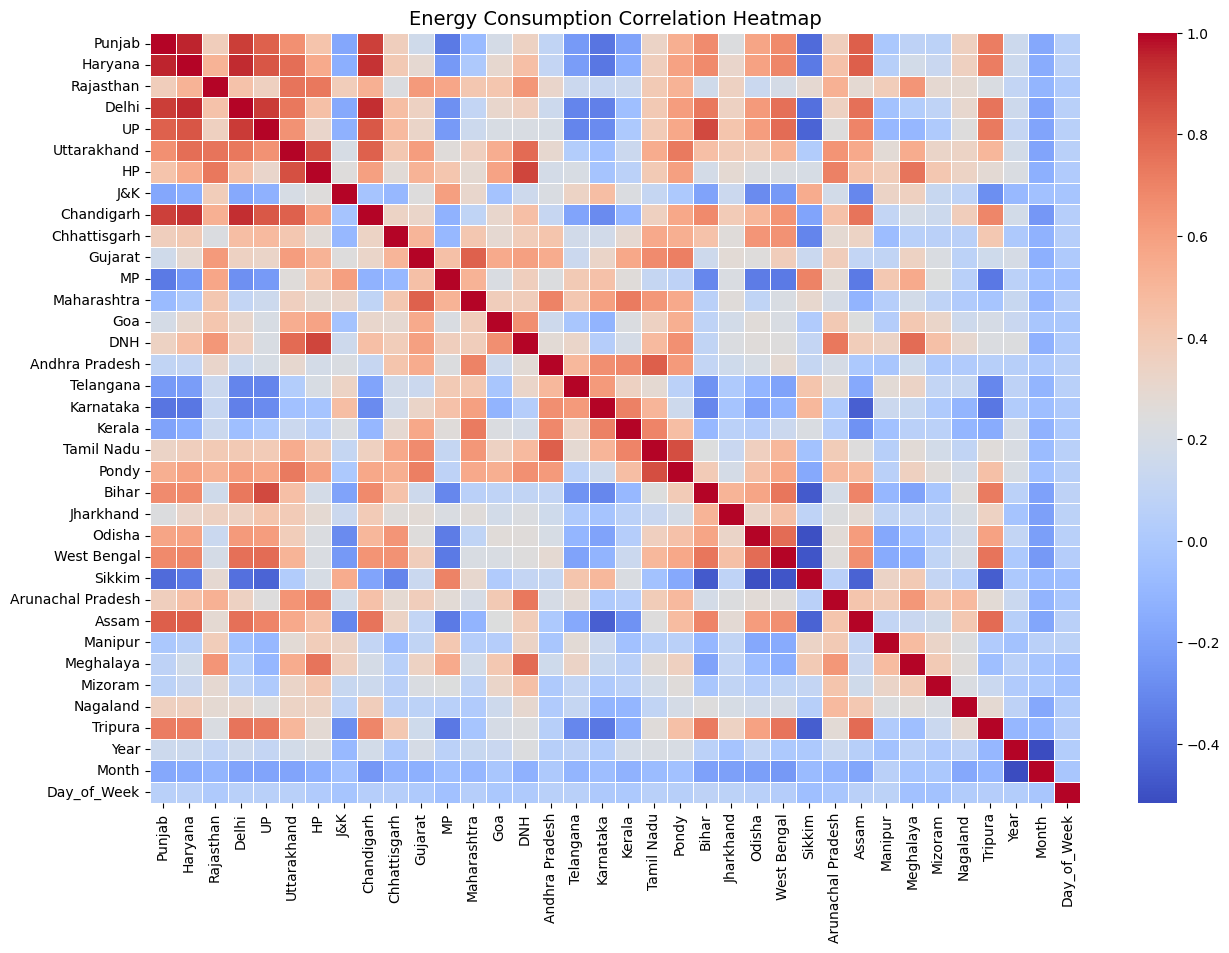

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(15, 10))

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)

# Title for the plot
plt.title("Energy Consumption Correlation Heatmap", fontsize=14)
plt.show()


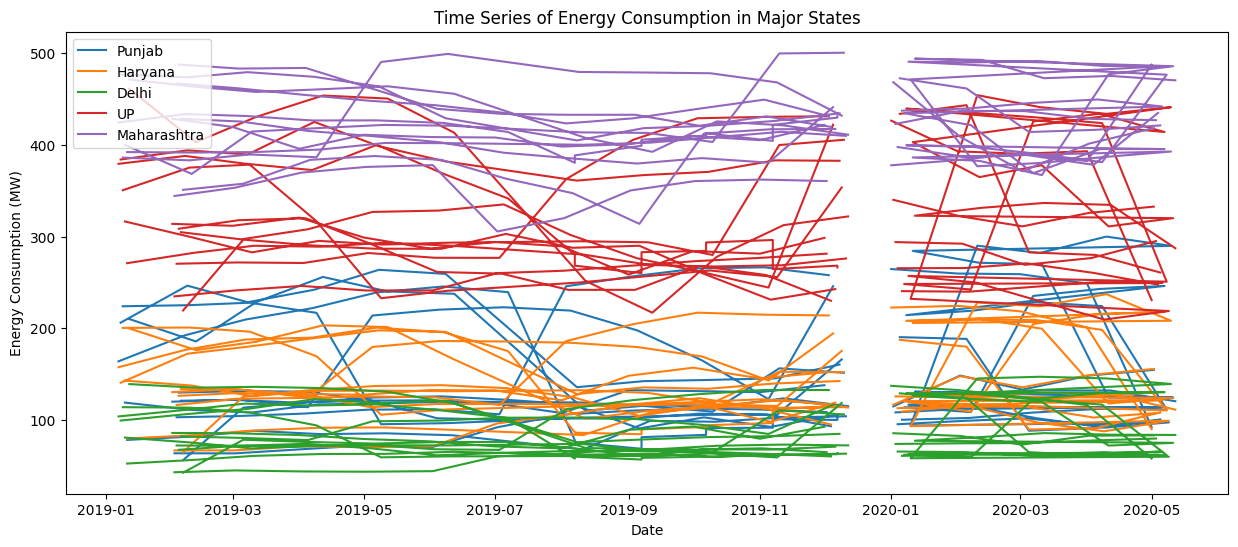

In [5]:
# Plot time series trends for a few major states
plt.figure(figsize=(15, 6))
for state in ["Punjab", "Haryana", "Delhi", "UP", "Maharashtra"]:
    plt.plot(df["Date"], df[state], label=state)

plt.xlabel("Date")
plt.ylabel("Energy Consumption (MW)")
plt.title("Time Series of Energy Consumption in Major States")
plt.legend()
plt.show()


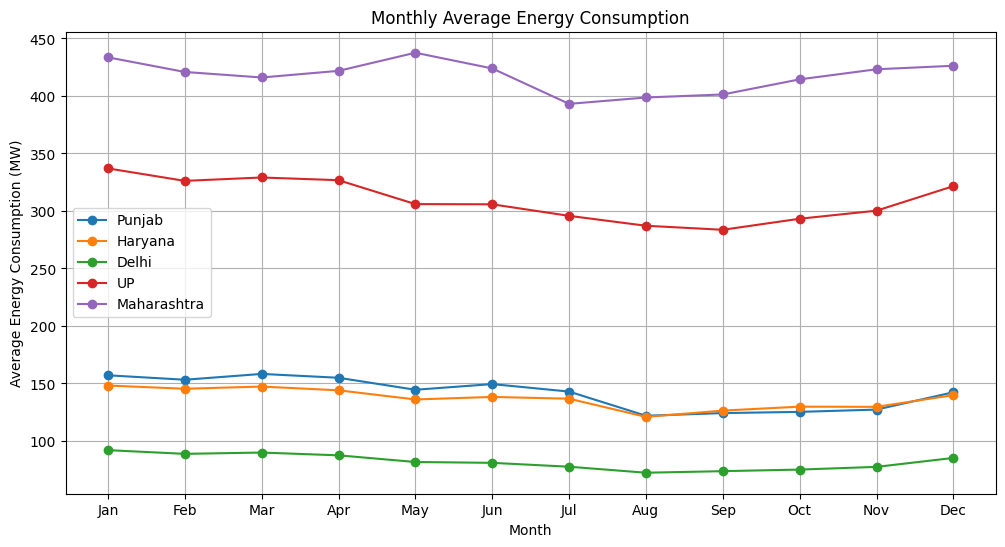

In [6]:
# Group by month and calculate average consumption per month for major states
monthly_avg = df.groupby("Month")[["Punjab", "Haryana", "Delhi", "UP", "Maharashtra"]].mean()

# Plot monthly energy consumption trends
plt.figure(figsize=(12, 6))
for state in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[state], marker='o', label=state)

plt.xlabel("Month")
plt.ylabel("Average Energy Consumption (MW)")
plt.title("Monthly Average Energy Consumption")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend()
plt.grid(True)
plt.show()



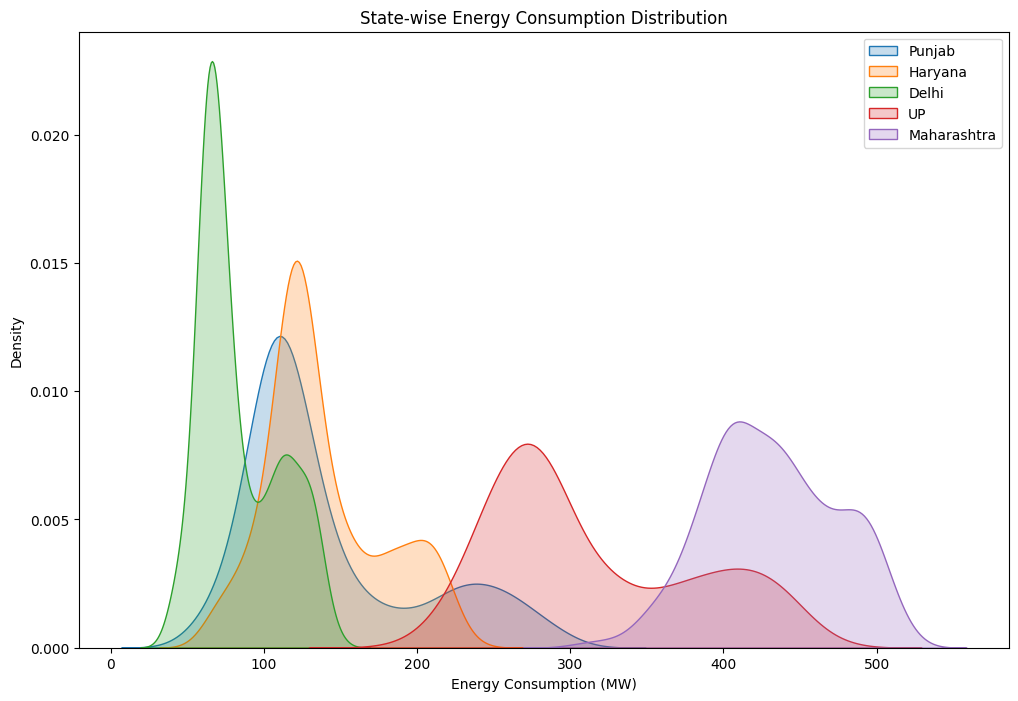

In [7]:
# Distribution plots for a few selected states
selected_states = ["Punjab", "Haryana", "Delhi", "UP", "Maharashtra"]

plt.figure(figsize=(12, 8))
for state in selected_states:
    sns.kdeplot(df[state], label=state, fill=True)

plt.xlabel("Energy Consumption (MW)")
plt.ylabel("Density")
plt.title("State-wise Energy Consumption Distribution")
plt.legend()
plt.show()


C:\Users\sandi\AppData\Local\Temp\ipykernel_25524\2175692316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_wb.index, y=monthly_wb.values, palette="viridis")


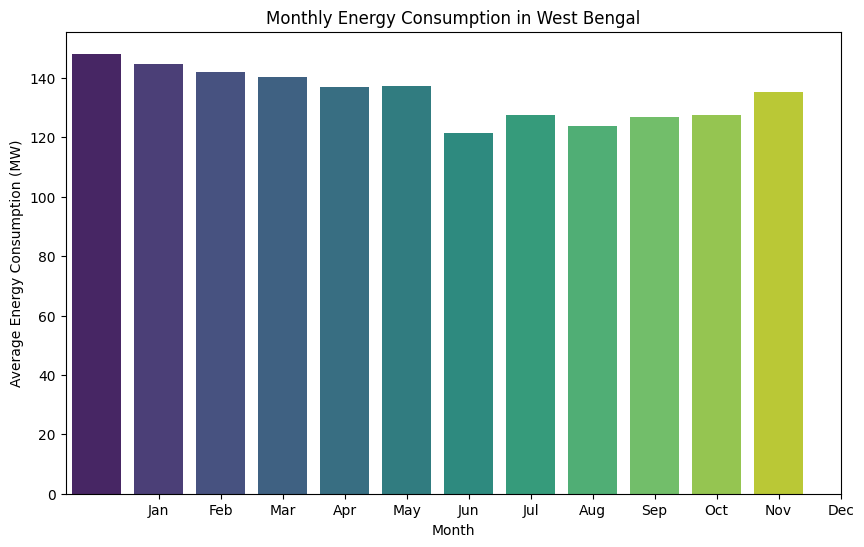

In [8]:
# Group data by month and calculate average energy consumption for West Bengal
monthly_wb = df.groupby("Month")["West Bengal"].mean()

# Bar plot for energy consumption in West Bengal by month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_wb.index, y=monthly_wb.values, palette="viridis")

plt.xlabel("Month")
plt.ylabel("Average Energy Consumption (MW)")
plt.title("Monthly Energy Consumption in West Bengal")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()


<Figure size 1200x800 with 0 Axes>

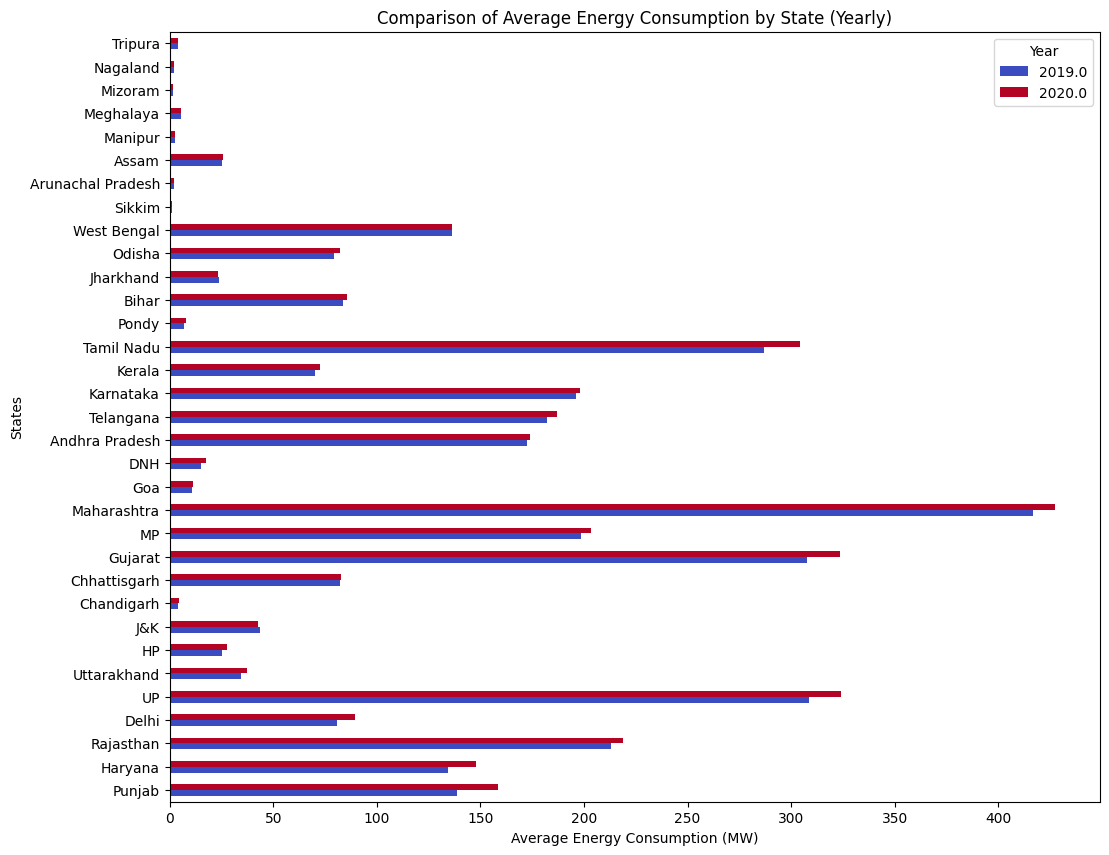

In [9]:
# Calculate average energy consumption for each state per year
state_columns = df.columns[1:-3]  # Excluding Date, Year, Month, and Day_of_Week
avg_consumption_yearly = df.groupby("Year")[state_columns].mean().T

# Plot histogram comparison
plt.figure(figsize=(12, 8))
avg_consumption_yearly.plot(kind="barh", figsize=(12, 10), colormap="coolwarm")

plt.xlabel("Average Energy Consumption (MW)")
plt.ylabel("States")
plt.title("Comparison of Average Energy Consumption by State (Yearly)")
plt.legend(title="Year")
plt.show()


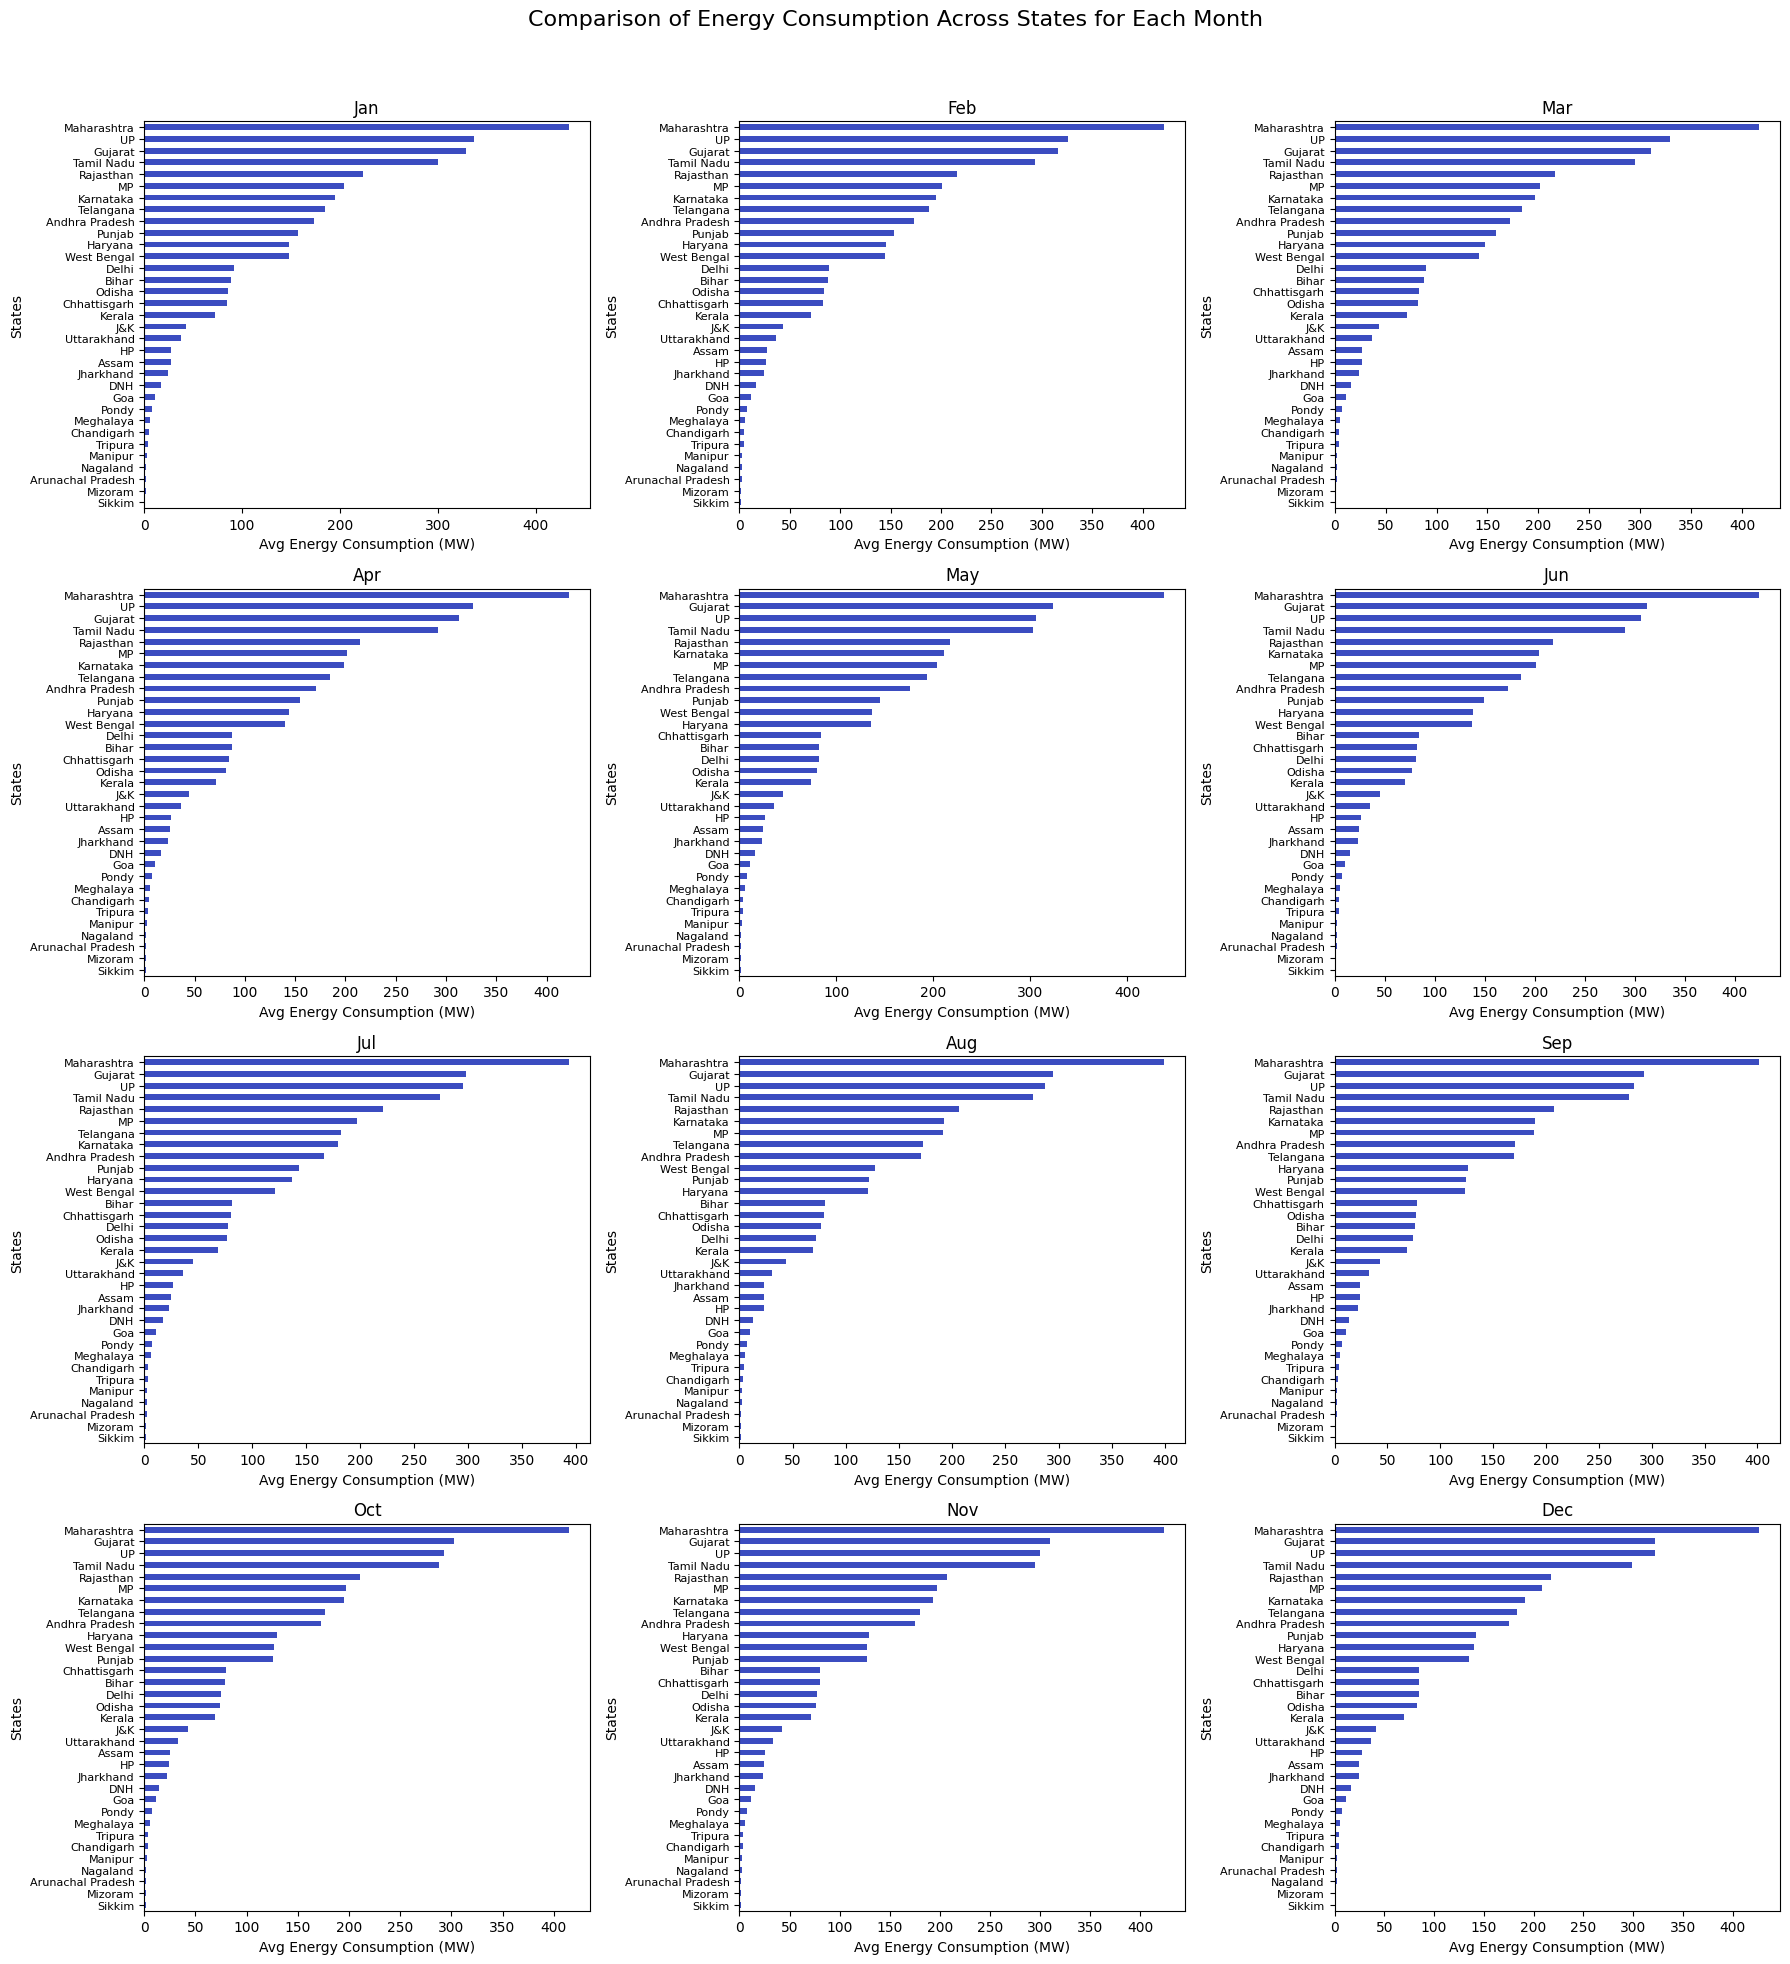

In [12]:
# Monthly Energy Consumption Comparison Across States
avg_consumption_monthly = df.groupby("Month")[state_columns].mean().T
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle("Comparison of Energy Consumption Across States for Each Month", fontsize=16)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i, ax in enumerate(axes.flat):
    if i < 12:
        avg_consumption_monthly.iloc[:, i].sort_values().plot(kind="barh", ax=ax, colormap="coolwarm")
        ax.set_title(month_names[i])
        ax.set_xlabel("Avg Energy Consumption (MW)")
        ax.set_ylabel("States")
        ax.tick_params(axis="y", labelsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

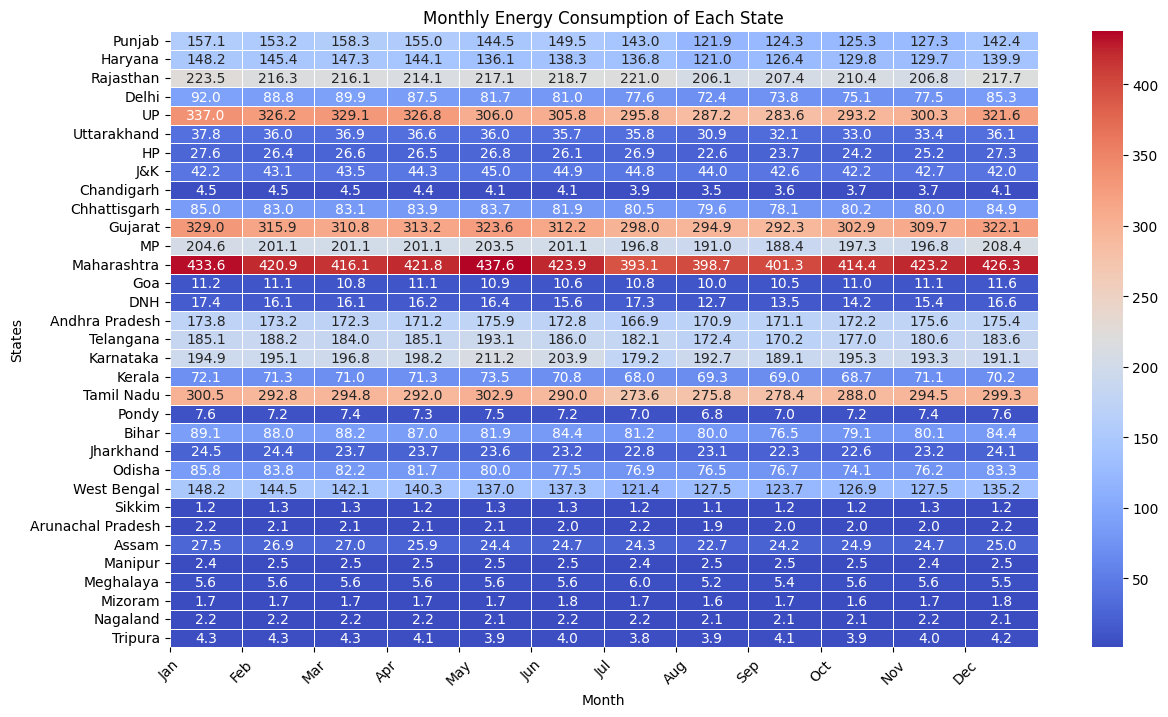

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Energy-Consumption-Dataset-India(2019-2020).csv"
df = pd.read_csv(file_path)

# Data Cleaning & Feature Engineering
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
state_columns = [col for col in numeric_columns if col not in ['Month', 'Year', 'Day_of_Week']]

# Group by Month and calculate the mean energy consumption per state
monthly_consumption = df.groupby("Month")[state_columns].mean()

# Plot Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_consumption.T, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.xlabel("Month")
plt.ylabel("States")
plt.title("Monthly Energy Consumption of Each State")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)

plt.show()


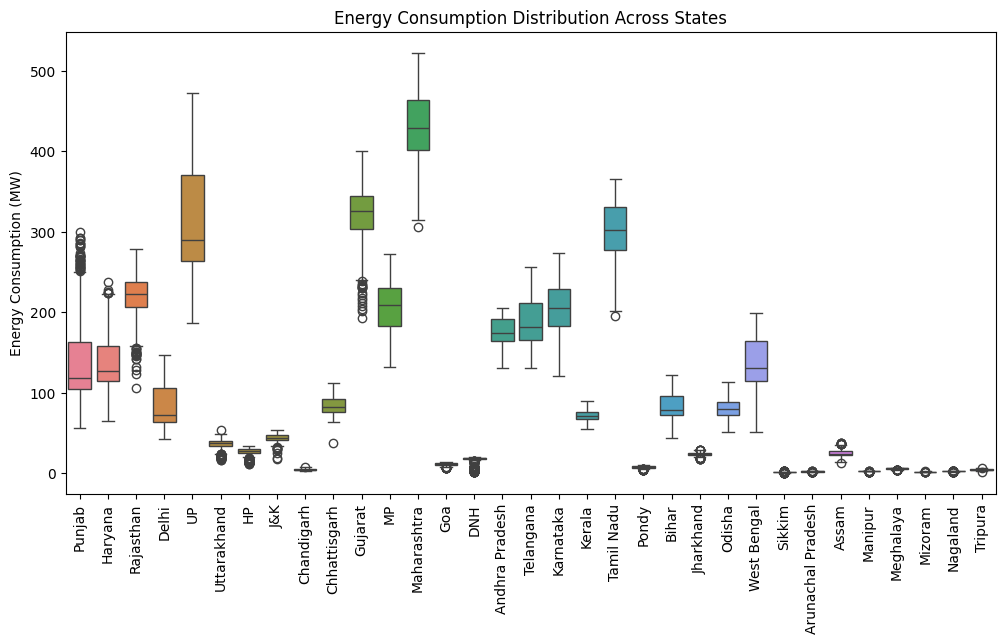

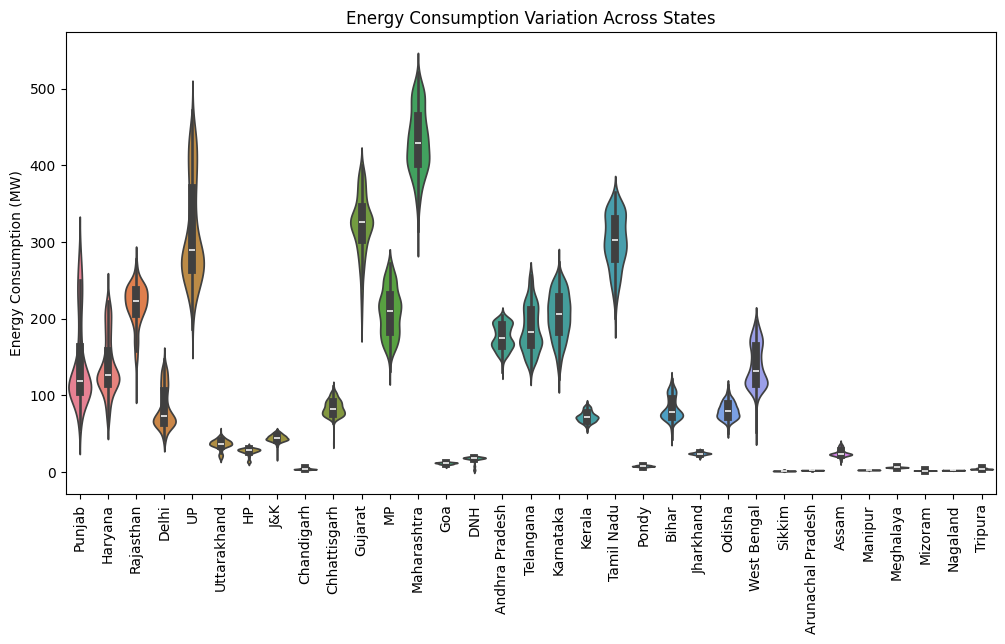

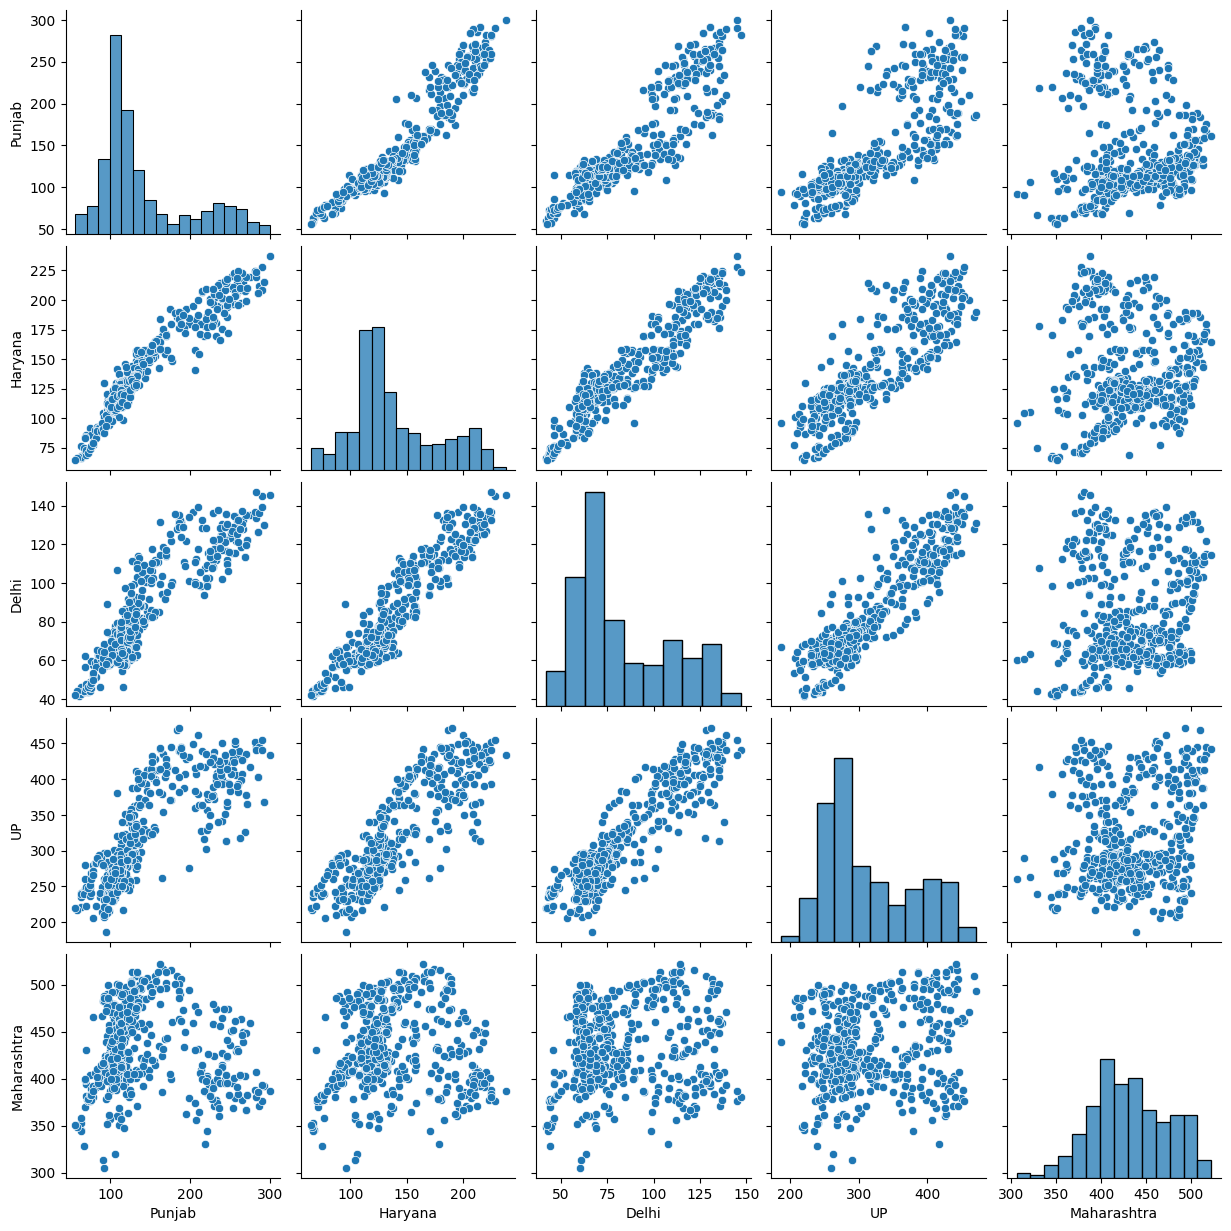

C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roami

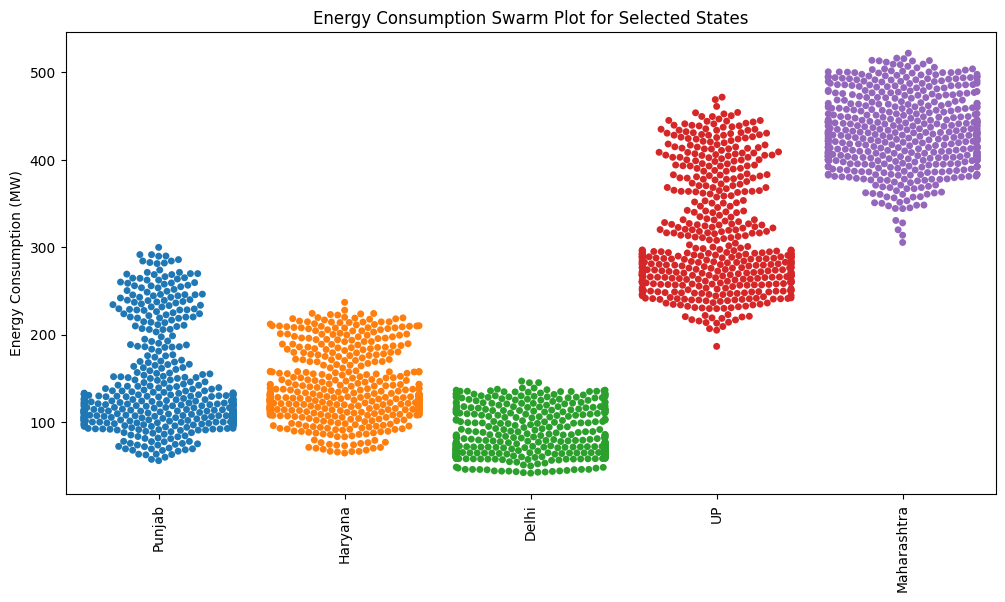

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
file_path = "Energy-Consumption-Dataset-India(2019-2020).csv"
df = pd.read_csv(file_path)

# Data Cleaning & Feature Engineering
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Drop non-numeric columns for correlation analysis
state_columns = df.columns[1:-3]
correlation_matrix = df[state_columns].corr()


# 1. Box Plot for Energy Consumption Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[state_columns])
plt.xticks(rotation=90)
plt.title("Energy Consumption Distribution Across States")
plt.ylabel("Energy Consumption (MW)")
plt.show()

# 2. Violin Plot for Energy Consumption Variation
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[state_columns])
plt.xticks(rotation=90)
plt.title("Energy Consumption Variation Across States")
plt.ylabel("Energy Consumption (MW)")
plt.show()

# 3. Pair Plot for Selected States
selected_states = ["Punjab", "Haryana", "Delhi", "UP", "Maharashtra"]
sns.pairplot(df[selected_states])
plt.show()

# 5. Swarm Plot for Selected States
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df[selected_states])
plt.xticks(rotation=90)
plt.title("Energy Consumption Swarm Plot for Selected States")
plt.ylabel("Energy Consumption (MW)")
plt.show()


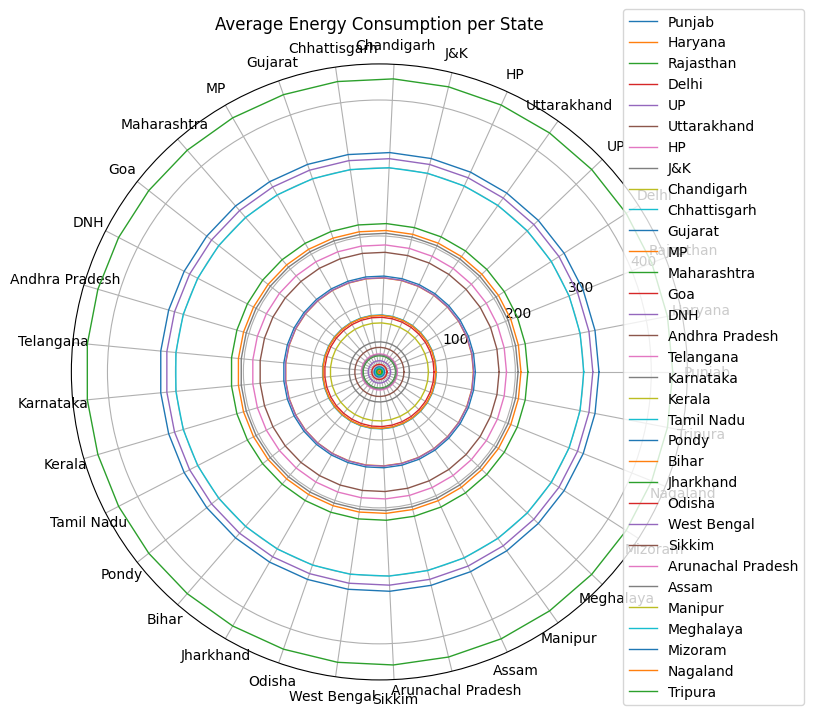

C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sandi\AppData\Roami

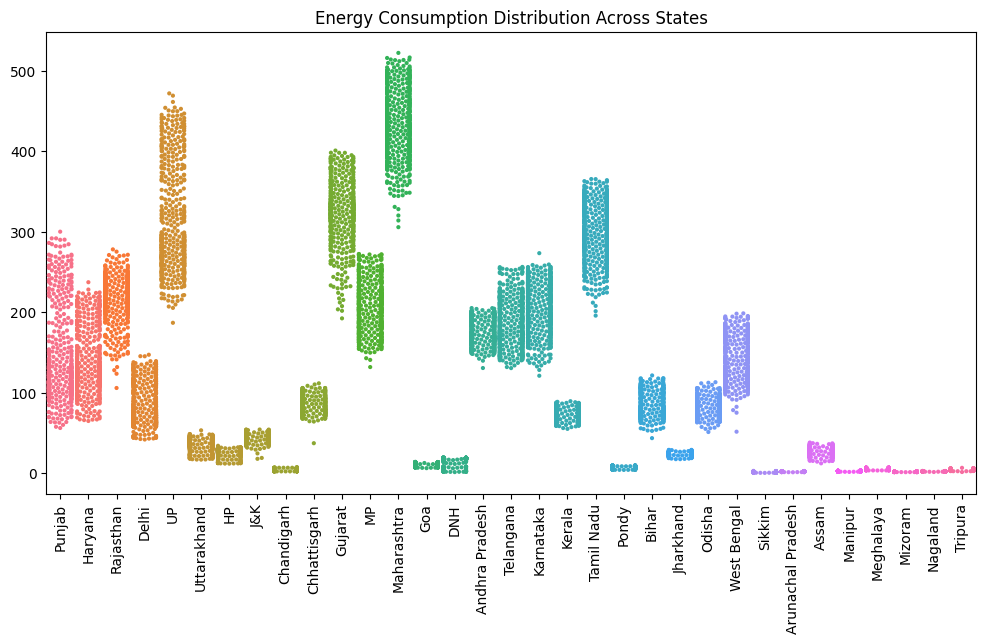

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Load dataset
file_path = "Energy-Consumption-Dataset-India(2019-2020).csv"
df = pd.read_csv(file_path)

# Fix: Use `.items()` instead of `.iteritems()`
state_columns = df.columns[1:]  # Assuming first column is not a state

# Radar chart (Polar Plot)
N = len(state_columns)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for index, mean_value in df[state_columns].mean().items():
    if index in state_columns:
        values = [mean_value] * N
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(state_columns, fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Average Energy Consumption per State")
plt.show()

# Fix: Use `swarmplot()` instead of `stripplot()` (or set `jitter=True`)
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df[state_columns], size=3)
plt.xticks(rotation=90)
plt.title("Energy Consumption Distribution Across States")
plt.show()


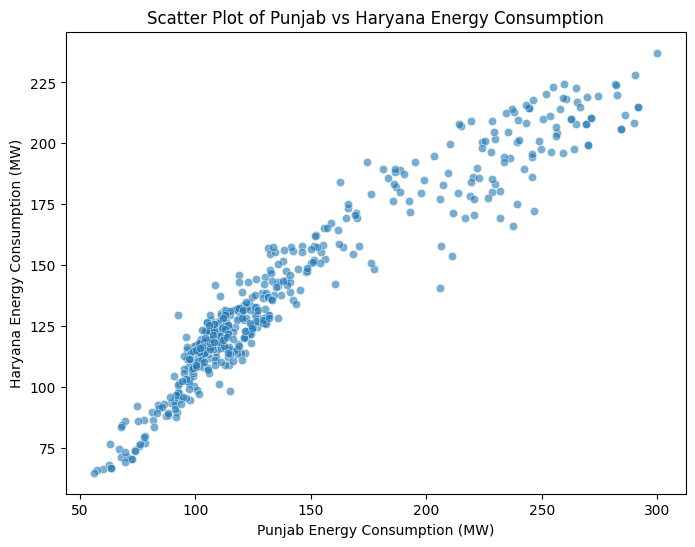

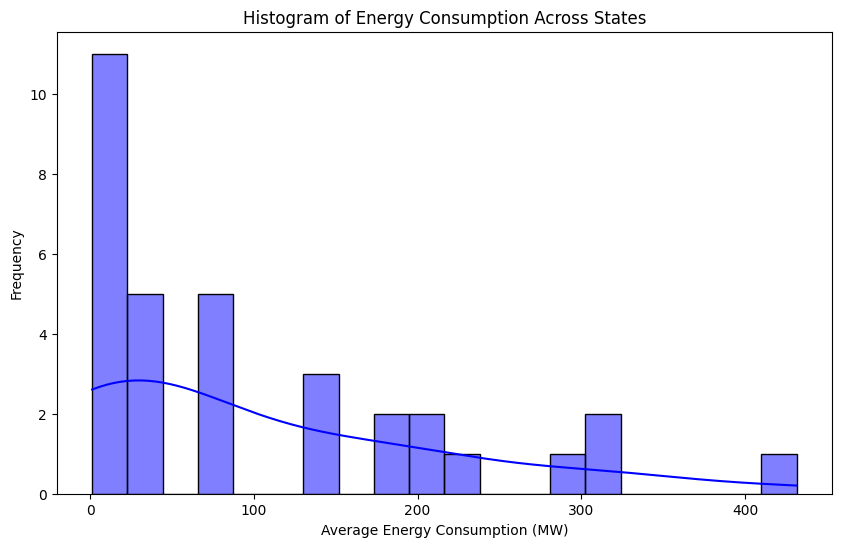

C:\Users\sandi\AppData\Local\Temp\ipykernel_25524\4178345615.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette="magma")


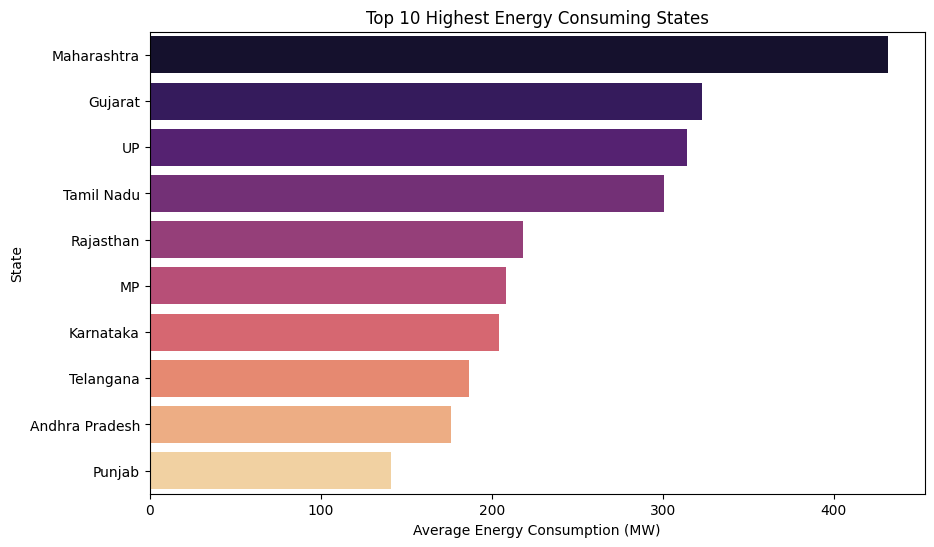

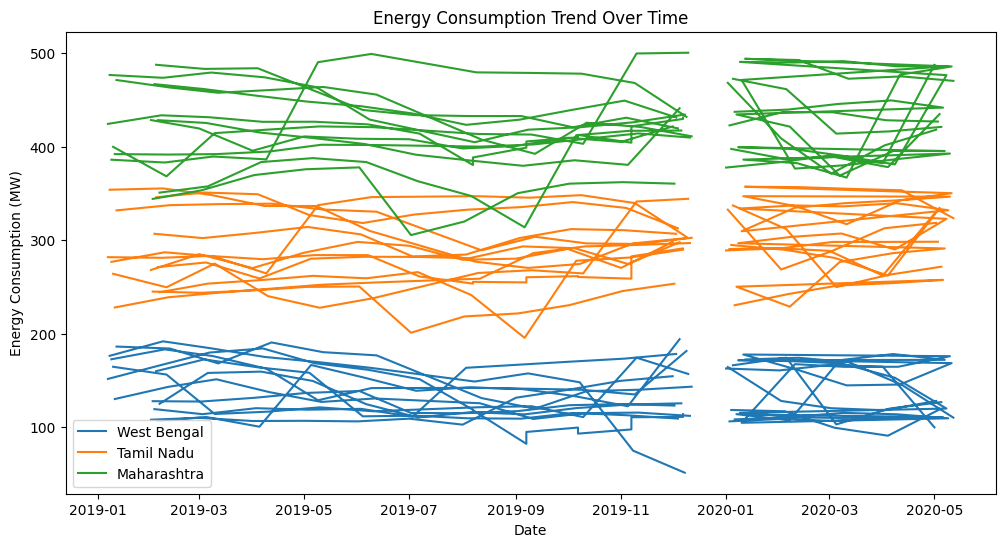

In [21]:
# 7. Scatter Plot for Energy Consumption between Two Major States
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Punjab'], y=df['Haryana'], alpha=0.6)
plt.xlabel("Punjab Energy Consumption (MW)")
plt.ylabel("Haryana Energy Consumption (MW)")
plt.title("Scatter Plot of Punjab vs Haryana Energy Consumption")
plt.show()

# 8. Histogram of Energy Consumption Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[state_columns].mean(), bins=20, kde=True, color='blue')
plt.xlabel("Average Energy Consumption (MW)")
plt.ylabel("Frequency")
plt.title("Histogram of Energy Consumption Across States")
plt.show()

# 9. Bar Plot for Top 10 Highest Energy Consuming States
top_10_states = df[state_columns].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette="magma")
plt.xlabel("Average Energy Consumption (MW)")
plt.ylabel("State")
plt.title("Top 10 Highest Energy Consuming States")
plt.show()

# 10. Line Plot for Energy Consumption Trend Over Time
plt.figure(figsize=(12, 6))
for state in ["West Bengal", "Tamil Nadu", "Maharashtra"]:
    plt.plot(df['Date'], df[state], label=state)
plt.xlabel("Date")
plt.ylabel("Energy Consumption (MW)")
plt.title("Energy Consumption Trend Over Time")
plt.legend()
plt.show()


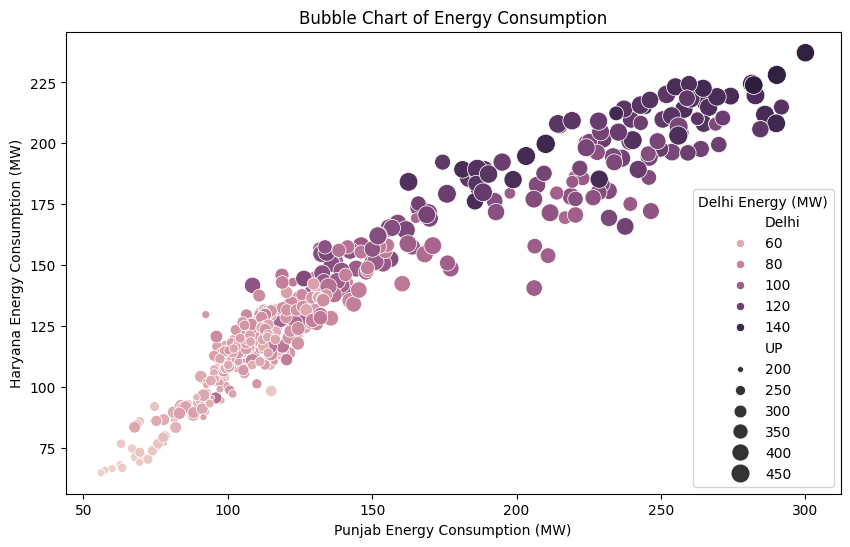

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Punjab'], y=df['Haryana'], size=df['UP'], hue=df['Delhi'], sizes=(10, 200))
plt.xlabel("Punjab Energy Consumption (MW)")
plt.ylabel("Haryana Energy Consumption (MW)")
plt.title("Bubble Chart of Energy Consumption")
plt.legend(title="Delhi Energy (MW)")
plt.show()


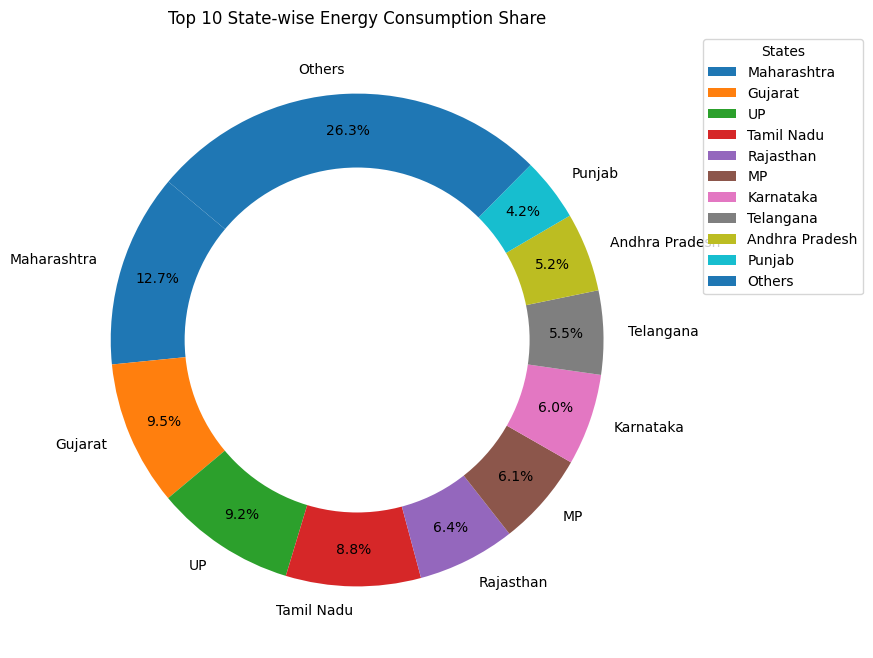

In [30]:
state_avg = df[state_columns].mean().sort_values(ascending=False)

# Group smaller states into "Others"
top_n = 10  # Number of states to display individually
top_states = state_avg[:top_n]  # Top N states
other_states = state_avg[top_n:].sum()  # Sum of the remaining states

# Combine into final data
final_labels = list(top_states.index) + ["Others"]
final_sizes = list(top_states.values) + [other_states]

# Create the donut chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    final_sizes, labels=final_labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85
)

# Adjust text sizes
for text in texts + autotexts:
    text.set_fontsize(10)  # Reduce font size for better readability

# Add a center circle to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add a title and legend
plt.title("Top 10 State-wise Energy Consumption Share")
plt.legend(wedges, final_labels, title="States", bbox_to_anchor=(1.05, 1), loc="best")

plt.show()


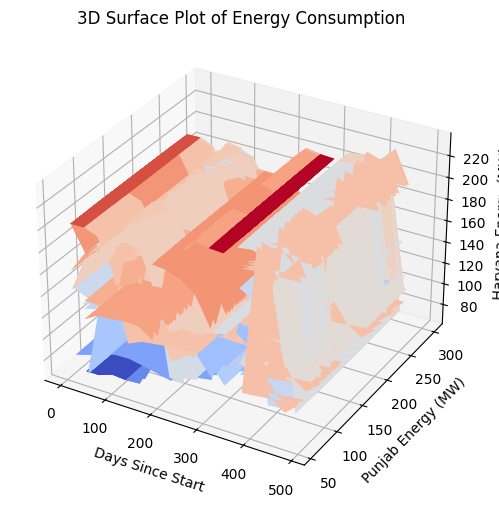

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# Convert Date column to numeric format
df["Date_Num"] = (df["Date"] - df["Date"].min()).dt.days  # Convert date to integer days

# Select the states to plot
X = df["Date_Num"].values  # X-axis: Dates in numeric format
Y = df["Punjab"].values  # Y-axis: Punjab Energy Consumption
Z = df["Haryana"].values  # Z-axis: Haryana Energy Consumption

# Reshape data into a 2D grid (necessary for surface plot)
X, Y = np.meshgrid(X, Y)

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(X, Y, np.tile(Z, (len(Y), 1)), cmap=cm.coolwarm)

ax.set_xlabel("Days Since Start")
ax.set_ylabel("Punjab Energy (MW)")
ax.set_zlabel("Haryana Energy (MW)")
ax.set_title("3D Surface Plot of Energy Consumption")

plt.show()


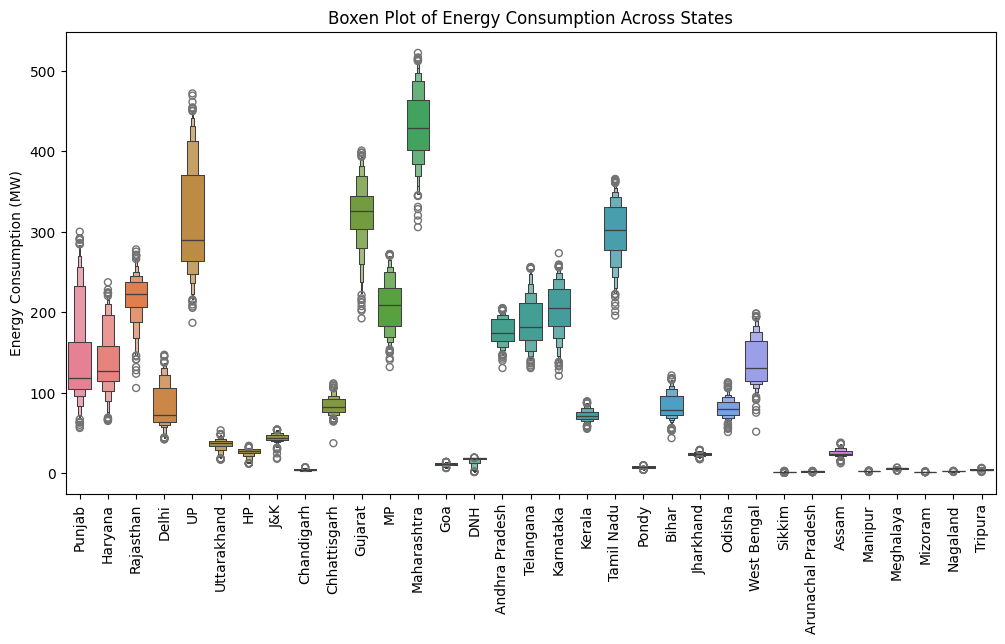

In [26]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df[state_columns])
plt.xticks(rotation=90)
plt.title("Boxen Plot of Energy Consumption Across States")
plt.ylabel("Energy Consumption (MW)")
plt.show()


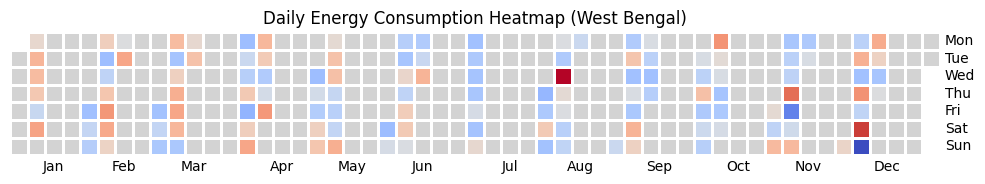

In [28]:
import calmap
plt.figure(figsize=(12, 6))
calmap.yearplot(df.set_index("Date")["West Bengal"], cmap="coolwarm", fillcolor='lightgrey')
plt.title("Daily Energy Consumption Heatmap (West Bengal)")
plt.show()


In [42]:
import plotly.express as px

# Prepare data: Convert to long format
df_long = df.melt(id_vars=["Month"], value_vars=state_columns, var_name="State", value_name="Energy")

# Drop rows where Month or Energy has NaN values
df_long = df_long.dropna(subset=["Month", "Energy"])

# Ensure Month is categorical for correct ordering
df_long["Month"] = df_long["Month"].astype(int).astype(str)

# Create Sunburst Chart
fig = px.sunburst(df_long, path=["Month", "State"], values="Energy", title="State-wise Energy Consumption Breakdown")
fig.show()


In [35]:
import plotly.graph_objects as go

# Define sources and targets
sources = ["Total Energy"] * len(state_columns)
targets = state_columns
values = df[state_columns].mean().values  # Avg energy consumption per state

# Create Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(label=sources + targets),
    link=dict(source=[0] * len(targets), target=list(range(1, len(targets) + 1)), value=values)
))

fig.update_layout(title_text="Energy Flow Across States", font_size=10)
fig.show()


In [36]:
import plotly.express as px

# Sample 10 states to reduce clutter
sample_states = state_columns[:10]

fig = px.parallel_coordinates(df[sample_states], labels={col: col for col in sample_states}, title="Parallel Coordinates Plot of Energy Consumption")
fig.show()


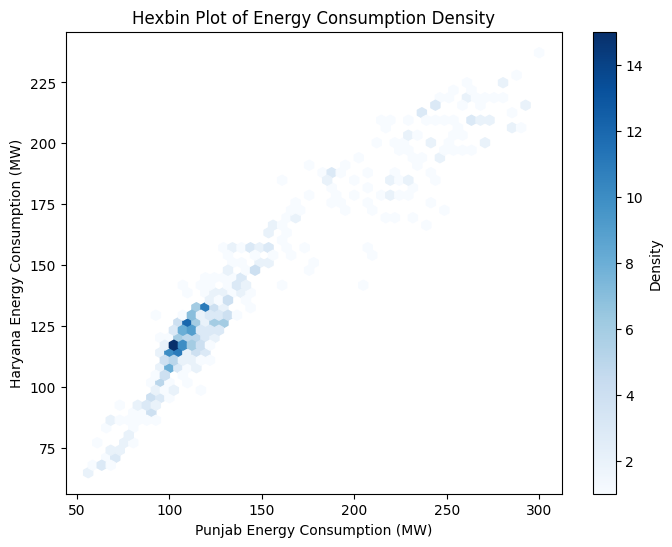

In [37]:
plt.figure(figsize=(8, 6))
plt.hexbin(df["Punjab"], df["Haryana"], gridsize=50, cmap="Blues", mincnt=1)
plt.colorbar(label="Density")
plt.xlabel("Punjab Energy Consumption (MW)")
plt.ylabel("Haryana Energy Consumption (MW)")
plt.title("Hexbin Plot of Energy Consumption Density")
plt.show()


In [43]:
import plotly.graph_objects as go

# Define sources and targets
sources = ["Punjab", "Punjab", "Haryana", "Haryana", "UP", "UP", "Delhi"]
targets = ["Haryana", "UP", "UP", "Delhi", "Delhi", "Punjab", "Punjab"]
values = [30, 10, 15, 25, 35, 20, 25]  # Energy exchange values

# Create Chord Diagram (Sankey format)
fig = go.Figure(go.Sankey(
    node=dict(label=list(set(sources + targets))),
    link=dict(source=[list(set(sources + targets)).index(s) for s in sources],
              target=[list(set(sources + targets)).index(t) for t in targets],
              value=values)
))

fig.update_layout(title_text="Chord Diagram of Energy Exchange", font_size=10)
fig.show()
